In [130]:
import pathlib
import os
import zipfile

import pandas as pd
from pyspark import SparkContext, SparkConf, SparkFiles
from pyspark.sql import SparkSession, Window
from pyspark.sql.functions import coalesce, desc, first, last, lead, lower, lpad, row_number, max, min, upper, year
from pyspark.sql.types import StructField, StructType, ByteType, DateType, FloatType, IntegerType, ShortType, StringType
import tqdm

In [2]:
pd.set_option("display.max_columns", None)

# Spark Configuration

In [3]:
conf = SparkConf()
conf.setMaster("local[*]").setAppName("Dataset Maker")

In [4]:
sc = SparkContext(conf=conf)

23/10/31 11:16:44 WARN Utils: Your hostname, asus-notebook resolves to a loopback address: 127.0.1.1; using 192.168.1.186 instead (on interface wlp3s0)
23/10/31 11:16:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/31 11:16:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
sc.uiWebUrl

'http://192.168.1.186:4040'

In [6]:
session = SparkSession(sc)

In [75]:
for fn in rsmp_csv_files[2:]:
    with open(fn) as fin:
        lines = fin.readlines()
        line1 = lines[1]
        line2 = lines[2]
        print(line1)
        _, _, _, d, *_ = line2.split(",")
        print(d)
        line1_parts = line1.split(",")
        line1_parts.insert(3, d)
        line1_new = ",".join(line1_parts)
        print(line1_new)
        lines[1] = line1_new
    with open(fn, "w") as fout:
        fout.write("".join(lines))


0,0,10.01.2017,211700714766,,РУСЛАН,ЛАТЫПОВ,ИЛЬДАРОВИЧ,,,,,50,МОСКОВСКАЯ,ОБЛАСТЬ,МЫТИЩИ,ГОРОДСКОЙ ОКРУГ,МЫТИЩИ,ГОРОД,,,69.10,"47.91.2, 47.91.4, 68.31.32, 68.31.52, 68.31.4, 68.31.51, 68.31.31, 68.31.2, 68.31.12, 68.31.42, 68.31, 68.31.11, 47.91.3, 49.32, 70.22, 68.10.23, 68.31.41, 68.31.21, 82.99, 68.31.22, 68.31.5, 68.32, 68.20, 68.31.1, 68.31.3,",900,VO_RRMSPSV_0000_9965_20170110_000c1080-5666-4d45-9704-2fdfe7fc48be

10.01.2017
0,0,10.01.2017,10.01.2017,211700714766,,РУСЛАН,ЛАТЫПОВ,ИЛЬДАРОВИЧ,,,,,50,МОСКОВСКАЯ,ОБЛАСТЬ,МЫТИЩИ,ГОРОДСКОЙ ОКРУГ,МЫТИЩИ,ГОРОД,,,69.10,"47.91.2, 47.91.4, 68.31.32, 68.31.52, 68.31.4, 68.31.51, 68.31.31, 68.31.2, 68.31.12, 68.31.42, 68.31, 68.31.11, 47.91.3, 49.32, 70.22, 68.10.23, 68.31.41, 68.31.21, 82.99, 68.31.22, 68.31.5, 68.32, 68.20, 68.31.1, 68.31.3,",900,VO_RRMSPSV_0000_9965_20170110_000c1080-5666-4d45-9704-2fdfe7fc48be

0,0,10.01.2018,10.01.2018,,,,,,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПАТЕНТНОЕ ДЕЛО""","ООО ""ПАТЕНТНОЕ ДЕЛО""",7728865002,,77

0,0,10.05.2017,352821993338,,АЛЕКСЕЙ,САПИЛОВ,ГЕННАДЬЕВИЧ,,,,,35,ВОЛОГОДСКАЯ,ОБЛАСТЬ,ЧЕРЕПОВЕЦКИЙ,РАЙОН,,,КОСТЯЕВКА,ДЕРЕВНЯ,69.10,"46.17, 73.11, 82.99, 68.31, 68.10, 70.22, 96.09, 68.32, 68.10.1,",900,VO_RRMSPSV_0000_9965_20170511_00198e86-fbff-4a5f-ae09-3826b4503599

10.05.2017
0,0,10.05.2017,10.05.2017,352821993338,,АЛЕКСЕЙ,САПИЛОВ,ГЕННАДЬЕВИЧ,,,,,35,ВОЛОГОДСКАЯ,ОБЛАСТЬ,ЧЕРЕПОВЕЦКИЙ,РАЙОН,,,КОСТЯЕВКА,ДЕРЕВНЯ,69.10,"46.17, 73.11, 82.99, 68.31, 68.10, 70.22, 96.09, 68.32, 68.10.1,",900,VO_RRMSPSV_0000_9965_20170511_00198e86-fbff-4a5f-ae09-3826b4503599

0,0,10.05.2018,771912823751,,АЛЕКСАНДР,СТЕПАНОВ,СЕРГЕЕВИЧ,,,,,77,Москва,Город,,,,,,,69.10,"71.12.6, 82.99, 71.12.5, 68.32, 71.1,",900,VO_RRMSPSV_0000_9965_20180510_001e1a6b-6439-457b-813f-f5ee59eb0b47

10.05.2018
0,0,10.05.2018,10.05.2018,771912823751,,АЛЕКСАНДР,СТЕПАНОВ,СЕРГЕЕВИЧ,,,,,77,Москва,Город,,,,,,,69.10,"71.12.6, 82.99, 71.12.5, 68.32, 71.1,",900,VO_RRMSPSV_0000_9965_20180510_001e1a6b-6439-457b-813f-f5ee59eb0b47

0,0,10.05.2019,,

0,0,10.09.2016,772800342610,,ИННА,ЛЕСНОВА,БОРИСОВНА,,,,,77,МОСКВА,ГОРОД,,,,,,,69.10,"78.30, 90.01, 93.29, 70.22, 59.14, 60.10, 59.11, 69.20, 68.20, 73.11, 18.12, 60.20,",900,VO_RRMSPSV_0000_9965_20160912_00080c2a-1680-4667-a472-c7fe2a7d6ac7

10.09.2016
0,0,10.09.2016,10.09.2016,772800342610,,ИННА,ЛЕСНОВА,БОРИСОВНА,,,,,77,МОСКВА,ГОРОД,,,,,,,69.10,"78.30, 90.01, 93.29, 70.22, 59.14, 60.10, 59.11, 69.20, 68.20, 73.11, 18.12, 60.20,",900,VO_RRMSPSV_0000_9965_20160912_00080c2a-1680-4667-a472-c7fe2a7d6ac7

0,0,10.09.2018,440102787520,,АЛЕКСАНДР,ШЕСТАНОВ,ЮРЬЕВИЧ,,,,,44,Костромская,Область,,,Кострома,Город,,,69.10,"70.22,",900,VO_RRMSPSV_0000_9965_20180910_00003025-2956-47a3-a23e-b2693ad7889f

10.09.2018
0,0,10.09.2018,10.09.2018,440102787520,,АЛЕКСАНДР,ШЕСТАНОВ,ЮРЬЕВИЧ,,,,,44,Костромская,Область,,,Кострома,Город,,,69.10,"70.22,",900,VO_RRMSPSV_0000_9965_20180910_00003025-2956-47a3-a23e-b2693ad7889f

0,0,10.09.2019,910218677240,,МАКСИМ,ЛЮБИВЕЦ,НИКОЛАЕВИЧ,,,,,91,КРЫМ,РЕСПУБЛИКА,,,СИМФЕРОПОЛЬ,ГО

0,0,10.04.2023,637801164168,319631300098080,ТАТЬЯНА,КОРЕНЬКОВА,ВЛАДИМИРОВНА,,,,,63,САМАРСКАЯ,ОБЛАСТЬ,,,САМАРА,ГОРОД,,,69.10,"46.31.2, 69.20, 46.21.1, 47.29.1, 46.23, 46.33.1, 01.13.1, 96.09, 46.38.1, 52.21.29, 63.99, 01.11.1, 74.20, 82.20,",900,VO_RRMSPSV_0000_9965_20230411_00037d8f-c915-4c28-b1a2-8aa159be0f0f

10.04.2023
0,0,10.04.2023,10.04.2023,637801164168,319631300098080,ТАТЬЯНА,КОРЕНЬКОВА,ВЛАДИМИРОВНА,,,,,63,САМАРСКАЯ,ОБЛАСТЬ,,,САМАРА,ГОРОД,,,69.10,"46.31.2, 69.20, 46.21.1, 47.29.1, 46.23, 46.33.1, 01.13.1, 96.09, 46.38.1, 52.21.29, 63.99, 01.11.1, 74.20, 82.20,",900,VO_RRMSPSV_0000_9965_20230411_00037d8f-c915-4c28-b1a2-8aa159be0f0f

0,0,10.05.2021,,,,,,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ  ""ТИРЕКС""","ООО ""ТИРЕКС""",4345250584,,43,КИРОВСКАЯ,ОБЛАСТЬ,,,КИРОВ,ГОРОД,,,69.10,"18.1, 58, 60.10, 60.20, 62.01, 62.02, 62.09, 63.11.1, 73.20.1, 77.33, 82.99,",900,VO_RRMSPSV_0000_9965_20210510_0a6f6bdd-e1f6-41ee-8dba-aefd76d77b56

10.05.2021
0,0,10.05.2021,10.05.2021,,,,,,"ОБЩЕСТВО С 

0,0,10.08.2022,470516440265,319470400054445,КОНСТАНТИН,САЛЬЦЕВ,АЛЕКСЕЕВИЧ,,,,,47,ЛЕНИНГРАДСКАЯ,ОБЛАСТЬ,ГАТЧИНСКИЙ,РАЙОН,КОММУНАР,ГОРОД,,,69.10,"70.22,",900,VO_RRMSPSV_0000_9965_20220810_00008538-8ad5-4d3f-94d5-5396634da961

10.08.2022
0,0,10.08.2022,10.08.2022,470516440265,319470400054445,КОНСТАНТИН,САЛЬЦЕВ,АЛЕКСЕЕВИЧ,,,,,47,ЛЕНИНГРАДСКАЯ,ОБЛАСТЬ,ГАТЧИНСКИЙ,РАЙОН,КОММУНАР,ГОРОД,,,69.10,"70.22,",900,VO_RRMSPSV_0000_9965_20220810_00008538-8ad5-4d3f-94d5-5396634da961

0,0,10.09.2020,253812376320,,РАДЖАБАЛИ,АБДУЛЛАЕВ,САНГАЛИЕВИЧ,,,,,25,Приморский,Край,,,Владивосток,Город,,,69.10,"79.90, 47.11, 47.25, 65.11, 65.12, 78.10, 78.20, 78.30, 79.11,",900,VO_RRMSPSV_0000_9965_20200911_0005317f-d96e-4ac6-9700-5a66073f4ae4

10.09.2020
0,0,10.09.2020,10.09.2020,253812376320,,РАДЖАБАЛИ,АБДУЛЛАЕВ,САНГАЛИЕВИЧ,,,,,25,Приморский,Край,,,Владивосток,Город,,,69.10,"79.90, 47.11, 47.25, 65.11, 65.12, 78.10, 78.20, 78.30, 79.11,",900,VO_RRMSPSV_0000_9965_20200911_0005317f-d96e-4ac6-9700-5a66073f4ae4

0,0,10.09.

0,0,10.12.2022,710606168279,315715400020465,ОЛЕСЯ,МАРЕЕВА,НИКОЛАЕВНА,,,,,71,ТУЛЬСКАЯ,ОБЛАСТЬ,ЩЕКИНСКИЙ,РАЙОН,ЩЕКИНО,ГОРОД,,,69.10,"46.31, 46.49, 47.11, 47.19, 47.21, 47.22, 47.23, 47.24, 47.24.22, 47.25, 47.26, 47.29, 47.51, 47.51.1, 47.51.2, 47.52, 47.53, 47.71, 47.71.1, 47.71.2, 47.71.3, 47.71.4, 47.71.5, 47.71.6, 47.71.7, 47.71.8, 47.72, 47.72.1, 47.72.2, 47.75, 47.76, 47.76.1, 47.78.3, 47.91.2, 49.3, 49.32, 49.4, 49.41, 49.41.1, 49.41.2, 49.41.3, 49.42, 53.20.3, 64.19, 65.11, 65.12, 68.10, 68.20, 68.20.1, 68.20.2, 68.31, 68.32, 74.10, 77.11, 77.12, 77.31, 77.32, 79.11, 79.12, 79.90, 82.92, 82.99,",900,VO_RRMSPSV_0000_9965_20221210_0000b798-248b-4810-85b9-0a65640664d2

10.12.2022
0,0,10.12.2022,10.12.2022,710606168279,315715400020465,ОЛЕСЯ,МАРЕЕВА,НИКОЛАЕВНА,,,,,71,ТУЛЬСКАЯ,ОБЛАСТЬ,ЩЕКИНСКИЙ,РАЙОН,ЩЕКИНО,ГОРОД,,,69.10,"46.31, 46.49, 47.11, 47.19, 47.21, 47.22, 47.23, 47.24, 47.24.22, 47.25, 47.26, 47.29, 47.51, 47.51.1, 47.51.2, 47.52, 47.53, 47.71, 47.71.1, 47.71.2, 47.71.3, 47.71.

In [60]:
df.head(2)

,kind,category,reestr_date,data_date,ind_tin,ind_number,first_name,last_name,patronymic,org_name,org_short_name,org_tin,org_number,region_code,region_name,region_type,district_name,district_type,city_name,city_type,settlement_name,settlement_type,activity_code_main,activity_codes_additional,total,file_id
0,0,0,10.01.2019,NaN,NaN,NaN,NaN,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""Г.Е....","ООО ""Г.Е.Н.И.Я.""",8602274490,NaN,86,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА,АВТОНОМНЫЙ ОКРУГ,NaN,NaN,СУРГУТ,ГОРОД,NaN,NaN,69.10,"69.20.3,",900,VO_RRMSPSV_0000_9965_20190110_00019b6b-66db-47...,NaN
1,1,1,10.10.2016,10.01.2019,NaN,NaN,NaN,NaN,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЮРИД...","ООО ""ЮРКОНСАЛТИНГ""",8602272084,NaN,86,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА,АВТОНОМНЫЙ ОКРУГ,NaN,NaN,СУРГУТ,ГОРОД,NaN,NaN,69.10,"73.20, 73.11, 68.10, 81.21, 68.31, 69.20, 78.1...",900,VO_RRMSPSV_0000_9965_20190110_00019b6b-66db-47...


# Dataset Based on Small&Meduim Business Data

In [39]:
rsmp_schema = StructType([
    StructField("kind", ByteType(), False),
    StructField("category", ByteType(), False),
    StructField("reestr_date", DateType(), False),
    StructField("data_date", DateType(), False),
    StructField("ind_tin", StringType(), True),
    StructField("ind_number", StringType(), True),
    StructField("first_name", StringType(), True),
    StructField("last_name", StringType(), True),
    StructField("patronymic", StringType(), True),
    StructField("org_name", StringType(), True),
    StructField("org_short_name", StringType(), True),
    StructField("org_tin", StringType(), True),
    StructField("org_number", StringType(), True),
    StructField("region_code", ByteType(), True),
    StructField("region_name", StringType(), True),
    StructField("region_type", StringType(), True),
    StructField("district_name", StringType(), True),
    StructField("district_type", StringType(), True),
    StructField("city_name", StringType(), True),    
    StructField("city_type", StringType(), True),
    StructField("settlement_name", StringType(), True),
    StructField("settlement_type", StringType(), True),
    StructField("activity_code_main", StringType(), False),
    StructField("activity_codes_additional", StringType(), True),
    StructField("total", ShortType(), True), 
    StructField("file_id", StringType(), True), 
])
rsmp_path = pathlib.Path("rsmp/csv")
rsmp_csv_files = [str(fn) for fn in rsmp_path.glob("data-*.csv")]

In [54]:
rsmp = session.read.options(header=True, dateFormat="dd.MM.yyyy", escape='"').schema(rsmp_schema).csv(rsmp_csv_files)
rsmp.printSchema()

root
 |-- kind: byte (nullable = true)
 |-- category: byte (nullable = true)
 |-- reestr_date: date (nullable = true)
 |-- data_date: date (nullable = true)
 |-- ind_tin: string (nullable = true)
 |-- ind_number: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- patronymic: string (nullable = true)
 |-- org_name: string (nullable = true)
 |-- org_short_name: string (nullable = true)
 |-- org_tin: string (nullable = true)
 |-- org_number: string (nullable = true)
 |-- region_code: byte (nullable = true)
 |-- region_name: string (nullable = true)
 |-- region_type: string (nullable = true)
 |-- district_name: string (nullable = true)
 |-- district_type: string (nullable = true)
 |-- city_name: string (nullable = true)
 |-- city_type: string (nullable = true)
 |-- settlement_name: string (nullable = true)
 |-- settlement_type: string (nullable = true)
 |-- activity_code_main: string (nullable = true)
 |-- activity_codes_additio

In [22]:
rsmp.filter("org_tin = 276909812").orderBy("data_date").toPandas().duplicated(cols_to_check_for_duplicates)

23/10/30 18:44:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-06102018-structure-08012016.csv
23/10/30 18:44:18 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:44:33 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-06102020-structure-15052020.csv
23/10/30 18:44:33 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:44:51 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-02102019-structure-08012016.csv
23/10/30 18:44:51 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:44:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-04102018-structure-08012016.csv
23/10/30 18:45:00 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:45:09 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-05102017-structure-08012016.csv
23/10/30 18:45:10 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:45:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-02122018-structure-08012016.csv
23/10/30 18:45:20 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:45:36 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-03102017-structure-08012016.csv
23/10/30 18:45:37 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:45:52 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-08102018-structure-08012016.csv
23/10/30 18:45:52 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:46:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-10112020-structure-15052020.csv
23/10/30 18:46:03 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:46:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-09102016-structure-08012016.csv
23/10/30 18:46:12 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:46:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-07102019-structure-08012016.csv
23/10/30 18:46:16 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:46:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-03102020-structure-10102019.csv
23/10/30 18:46:20 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:46:27 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-06112017-structure-08012016.csv
23/10/30 18:46:28 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:46:35 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-10022023-structure-10032022.csv
23/10/30 18:46:35 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:46:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-01112018-structure-08012016.csv
23/10/30 18:46:42 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:46:46 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-04102017-structure-08012016.csv
23/10/30 18:46:47 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:46:51 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-10102019-structure-08012016.csv
23/10/30 18:46:51 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:46:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-10112020-structure-15052020.csv
23/10/30 18:46:57 WARN CSVHeaderChecker: CSV header does not conform to the sch

23/10/30 18:47:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: kind, category, reestr_date, date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
 Schema: kind, category, reestr_date, data_date, ind_tin, ind_number, first_name, last_name, patronymic, org_name, org_short_name, org_tin, org_number, region_code, region_name, region_type, district_name, district_type, city_name, city_type, settlement_name, settlement_type, activity_code_main, activity_codes_additional, total, file_id
Expected: data_date but found: date
CSV file: file:/media/data/Павел/Документы/Учёба/Аспирантура/tax-service-opendata/rsmp/csv/data-10102016-structure-08012016.csv
23/10/30 18:47:02 WARN CSVHeaderChecker: CSV header does not conform to the sch

0     False
1      True
2      True
3      True
4      True
      ...  
58     True
59     True
60     True
61     True
62     True
Length: 63, dtype: bool

In [21]:
(rsmp
 .filter("org_tin = 276909812")
 .withColumn("row_number", row_number().over(w_for_start_date))
 .withColumn("end_date", last("date").over(w_for_end_date))
 .toPandas()
)

,kind,category,reestr_date,date,ind_tin,ind_number,first_name,last_name,patronymic,org_name,org_short_name,org_tin,org_number,region_code,region_name,region_type,district_name,district_type,city_name,city_type,settlement_name,settlement_type,activity_code_main,activity_codes_additional,total,file_id,row_number,end_date
0,1,1,2016-08-01,2016-08-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИМПЕ...","ООО ""ИМПЕРИЯ НЕДВИЖИМОСТИ""",0276909812,None,2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,"68.20.2, 68.10.1, 70.22, 68.31.51, 68.20.1, 68...",901,VO_RRMSPSV_0000_9965_20160809_abab168f-8c5d-4f...,1,2016-08-10
1,1,1,2016-08-01,2016-09-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИМПЕ...","ООО ""ИМПЕРИЯ НЕДВИЖИМОСТИ""",0276909812,None,2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,"68.20.2, 68.31.4, 68.10.22, 68.20.1, 68.10.1, ...",900,VO_RRMSPSV_0000_9965_20160912_5006bc8d-df2c-4f...,2,2016-09-10
2,1,1,2016-08-01,2016-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИМПЕ...","ООО ""ИМПЕРИЯ НЕДВИЖИМОСТИ""",0276909812,None,2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,"68.20.2, 68.31.4, 68.10.22, 68.20.1, 68.10.1, ...",901,VO_RRMSPSV_0000_9965_20160920_4d27eefb-0ed0-4f...,3,2016-10-10
3,1,1,2016-08-01,2016-11-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИМПЕ...","ООО ""ИМПЕРИЯ НЕДВИЖИМОСТИ""",0276909812,None,2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,"68.10.21, 68.10.11, 68.31.51, 68.20, 68.31.32,...",901,VO_RRMSPSV_0000_9965_20161110_75cd1b35-27b4-4b...,4,2016-11-10
4,1,1,2016-08-01,2016-12-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИМПЕ...","ООО ""ИМПЕРИЯ НЕДВИЖИМОСТИ""",0276909812,None,2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,"68.10, 68.31, 68.31.21, 68.10.22, 70.22, 68.31...",901,VO_RRMSPSV_0000_9965_20161210_e43adfda-0e0b-40...,5,2016-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1,1,2016-08-01,2021-06-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИМПЕ...","ООО ""ИМПЕРИЯ НЕДВИЖИМОСТИ""",0276909812,None,2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,"68.20, 70.22, 68.10.11, 68.31.21, 68.31.42, 68...",901,VO_RRMSPSV_0000_9965_20210610_14267346-acbf-49...,59,2021-06-10
59,1,1,2021-08-10,2021-08-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИМПЕ...","ООО ""ИМПЕРИЯ НЕДВИЖИМОСТИ""",0276909812,1150280080884,2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,"68.31.22, 68.20, 68.10, 68.10.1, 68.31.4, 73.2...",901,VO_RRMSPSV_0000_9965_20210813_dd735b86-6928-4d...,60,2021-08-10
60,1,1,2021-08-10,2021-09-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИМПЕ...","ООО ""ИМПЕРИЯ НЕДВИЖИМОСТИ""",0276909812,1150280080884,2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,"68.31.31, 68.31.11, 68.20.1, 73.20, 68.31.51, ...",901,VO_RRMSPSV_0000_9965_20210912_8f4f448e-3e77-46...,61,2021-09-10
61,1,1,2021-08-10,2021-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИМПЕ...","ООО ""ИМПЕРИЯ НЕДВИЖИМОСТИ""",0276909812,1150280080884,2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,"68.31.2, 70.22, 68.10.12, 68.31.22, 68.10, 68....",901,VO_RRMSPSV_0000_9965_20211010_95878977-34cd-46...,62,2021-10-10


In [76]:
rsmp.limit(10).toPandas()

,kind,category,reestr_date,data_date,ind_tin,ind_number,first_name,last_name,patronymic,org_name,org_short_name,org_tin,org_number,region_code,region_name,region_type,district_name,district_type,city_name,city_type,settlement_name,settlement_type,activity_code_main,activity_codes_additional,total,file_id
0,0,0,2018-10-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""БИЗН...","ООО ""БИЗНЕС РАЗВИТИЕ""",7842152487,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"69.20,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
1,1,1,2018-05-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КОНС...","ООО ""КК ""СЕВЕРНЫЙ ВЕТЕР""",7842150754,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"78.10, 77.39.2, 46.90, 69.20.2, 73.11, 69.20.1...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
2,1,1,2018-07-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РЕКЛ...","ООО ""Р.О.М.А""",7842155294,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"78.10, 69.20.2, 82.99, 73.11, 46.90, 69.20, 77...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
3,1,1,2018-07-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРАН...","ООО ""ГРАНД ЛИЦЕНЗИРОВАНИЕ""",7842154195,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"96.09, 82.99, 73.11, 70.22, 41.20,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
4,1,1,2018-05-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КУЛА...","ООО ""КУЛАГИН И ПАРТНЕРЫ""",7842151910,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"82.19, 68.31, 70.10, 68.20, 68.32, 69.20, 82.1...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
5,1,1,2018-06-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЕВ5 ...","ООО ""ЕВ5 ПРАЙМ""",7842153508,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"74.30, 69.20, 70.22, 64.99,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
6,1,1,2018-08-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЮРИД...","ООО ""ЮК ""САТЕЛЛИТ""",7842156467,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,None,900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
7,1,1,2018-07-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЭКСП...","ООО ""ЭКСПЕРТ-С""",7842155248,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"69.20, 66.19.4, 70.22, 96.09, 78.10,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
8,1,1,2018-04-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АИБ ...","ООО ""АИБ ЛЕГАЛ""",7842150063,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"69.20, 70.10, 70.21, 69.20.3, 85.41.9, 69.20.1...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
9,1,1,2018-04-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРАВ...","ООО ""ПРАВОСУДИЕ""",7842150105,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"70.22, 78.30, 78.10, 62.09, 82.99, 69.20,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...


In [80]:
(
    rsmp
    .withColumn("tin", coalesce(rsmp["ind_tin"], rsmp["org_tin"]))
    .withColumn("reg_number", coalesce(rsmp["ind_number"], rsmp["org_number"]))
    .limit(50).toPandas()
                                            )

,kind,category,reestr_date,data_date,ind_tin,ind_number,first_name,last_name,patronymic,org_name,org_short_name,org_tin,org_number,region_code,region_name,region_type,district_name,district_type,city_name,city_type,settlement_name,settlement_type,activity_code_main,activity_codes_additional,total,file_id,tin,reg_number
0,0,0,2018-10-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""БИЗН...","ООО ""БИЗНЕС РАЗВИТИЕ""",7842152487,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"69.20,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842152487,None
1,1,1,2018-05-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КОНС...","ООО ""КК ""СЕВЕРНЫЙ ВЕТЕР""",7842150754,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"78.10, 77.39.2, 46.90, 69.20.2, 73.11, 69.20.1...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842150754,None
2,1,1,2018-07-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РЕКЛ...","ООО ""Р.О.М.А""",7842155294,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"78.10, 69.20.2, 82.99, 73.11, 46.90, 69.20, 77...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842155294,None
3,1,1,2018-07-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРАН...","ООО ""ГРАНД ЛИЦЕНЗИРОВАНИЕ""",7842154195,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"96.09, 82.99, 73.11, 70.22, 41.20,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842154195,None
4,1,1,2018-05-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КУЛА...","ООО ""КУЛАГИН И ПАРТНЕРЫ""",7842151910,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"82.19, 68.31, 70.10, 68.20, 68.32, 69.20, 82.1...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842151910,None
5,1,1,2018-06-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЕВ5 ...","ООО ""ЕВ5 ПРАЙМ""",7842153508,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"74.30, 69.20, 70.22, 64.99,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842153508,None
6,1,1,2018-08-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЮРИД...","ООО ""ЮК ""САТЕЛЛИТ""",7842156467,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,None,900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842156467,None
7,1,1,2018-07-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЭКСП...","ООО ""ЭКСПЕРТ-С""",7842155248,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"69.20, 66.19.4, 70.22, 96.09, 78.10,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842155248,None
8,1,1,2018-04-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АИБ ...","ООО ""АИБ ЛЕГАЛ""",7842150063,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"69.20, 70.10, 70.21, 69.20.3, 85.41.9, 69.20.1...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842150063,None
9,1,1,2018-04-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРАВ...","ООО ""ПРАВОСУДИЕ""",7842150105,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"70.22, 78.30, 78.10, 62.09, 82.99, 69.20,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842150105,None


In [129]:
from pyspark.sql.functions import lpad
rsmp.withColumn(
    "ind_tin_prefixed", lpad(col("org_tin"), 10, "0")
).limit(3).toPandas()

,kind,category,reestr_date,data_date,ind_tin,ind_number,first_name,last_name,patronymic,org_name,org_short_name,org_tin,org_number,region_code,region_name,region_type,district_name,district_type,city_name,city_type,settlement_name,settlement_type,activity_code_main,activity_codes_additional,total,file_id,ind_tin_prefixed
0,0,0,2018-10-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""БИЗН...","ООО ""БИЗНЕС РАЗВИТИЕ""",7842152487,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"69.20,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842152487
1,1,1,2018-05-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КОНС...","ООО ""КК ""СЕВЕРНЫЙ ВЕТЕР""",7842150754,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"78.10, 77.39.2, 46.90, 69.20.2, 73.11, 69.20.1...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842150754
2,1,1,2018-07-10,2018-10-10,None,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РЕКЛ...","ООО ""Р.О.М.А""",7842155294,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"78.10, 69.20.2, 82.99, 73.11, 46.90, 69.20, 77...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...,7842155294


In [89]:
w_for_reg_number = Window.partitionBy(["tin"]).orderBy("data_date").rowsBetween(0, Window.unboundedFollowing)

(rsmp
    .withColumn("tin", coalesce(rsmp["ind_tin"], rsmp["org_tin"]))
    .withColumn("reg_number", coalesce(rsmp["ind_number"], rsmp["org_number"]))
    .withColumn("reg_number", first("reg_number", ignorenulls=True).over(w_for_reg_number))
    #.filter("reg_number is not null")
    .limit(20)
    .toPandas()
)

,kind,category,reestr_date,data_date,ind_tin,ind_number,first_name,last_name,patronymic,org_name,org_short_name,org_tin,org_number,region_code,region_name,region_type,district_name,district_type,city_name,city_type,settlement_name,settlement_type,activity_code_main,activity_codes_additional,total,file_id,tin,reg_number
0,2,1,2016-08-01,2016-08-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"96.0, 52.23, 82.99, 03.1, 74.20, 52.23.19, 52....",901,VO_RRMSPSV_0000_9965_20160809_19a21267-a5a7-49...,010100056980,310010101900039
1,2,1,2016-08-01,2016-09-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"52.23.11, 96.0, 82.92, 52.23, 47.63.2, 52.23.1...",901,VO_RRMSPSV_0000_9965_20160912_ab541e3d-f594-48...,010100056980,310010101900039
2,2,1,2016-08-01,2016-10-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"52.23.11, 96.0, 82.92, 52.23, 47.63.2, 52.23.1...",901,VO_RRMSPSV_0000_9965_20160920_3711a178-25b6-4a...,010100056980,310010101900039
3,2,1,2016-08-01,2016-11-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"47.91.4, 74.30, 47.63.2, 03.2, 52.23.19, 03.1,...",901,VO_RRMSPSV_0000_9965_20161110_19128a14-9bb9-42...,010100056980,310010101900039
4,2,1,2016-08-01,2016-12-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"74.20, 47.91.3, 82.99, 47.91.4, 52.23.19, 96.0...",901,VO_RRMSPSV_0000_9965_20161210_95ec0e62-eb6c-4c...,010100056980,310010101900039
5,2,1,2016-08-01,2017-01-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"03.1, 47.63.2, 96.0, 82.92, 52.23.11, 52.23, 4...",901,VO_RRMSPSV_0000_9965_20170110_500095e0-458e-47...,010100056980,310010101900039
6,2,1,2016-08-01,2017-02-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"52.23.19, 74.30, 52.23, 82.99, 52.23.11, 03.2,...",901,VO_RRMSPSV_0000_9965_20170210_4684b4d1-218b-45...,010100056980,310010101900039
7,2,1,2016-08-01,2017-03-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"52.23, 74.30, 47.91.3, 03.2, 82.92, 52.23.11, ...",901,VO_RRMSPSV_0000_9965_20170310_a0fdcb74-a07c-4b...,010100056980,310010101900039
8,2,1,2016-08-01,2017-04-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"47.91.4, 82.92, 96.0, 82.99, 74.20, 47.91.3, 5...",901,VO_RRMSPSV_0000_9965_20170410_5e1b9322-6e61-41...,010100056980,310010101900039
9,2,1,2016-08-01,2017-05-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"52.23.11, 52.23, 47.91.4, 74.30, 82.99, 82.92,...",901,VO_RRMSPSV_0000_9965_20170511_65b7a557-4a48-42...,010100056980,310010101900039


In [86]:
rsmp.filter("ind_tin = 010100056980").toPandas()

,kind,category,reestr_date,data_date,ind_tin,ind_number,first_name,last_name,patronymic,org_name,org_short_name,org_tin,org_number,region_code,region_name,region_type,district_name,district_type,city_name,city_type,settlement_name,settlement_type,activity_code_main,activity_codes_additional,total,file_id
0,2,1,2016-08-01,2018-10-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"96.0, 47.63.2, 52.23.11, 82.99, 52.23.19, 03.1...",901,VO_RRMSPSV_0000_9965_20181010_786c5ed6-2a6b-4a...
1,2,1,2016-08-01,2019-07-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"74.20, 52.23.19, 96.0, 52.23, 82.92, 47.91.4, ...",901,VO_RRMSPSV_0000_9965_20190711_f35c25dd-7665-4c...
2,2,1,2016-08-01,2018-07-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"74.20, 47.91.4, 52.23.19, 52.23, 52.23.11, 47....",901,VO_RRMSPSV_0000_9965_20180710_8d7eb5da-17dd-4d...
3,2,1,2016-08-01,2020-05-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"74.30, 74.20, 82.92, 52.23, 47.91.4, 47.63.2, ...",901,VO_RRMSPSV_0000_9965_20200513_f9e8df71-0e7b-43...
4,2,1,2016-08-01,2019-06-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"47.91.3, 52.23.11, 82.92, 96.0, 47.63.2, 03.2,...",901,VO_RRMSPSV_0000_9965_20190611_e9628b69-37a9-4a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2,1,2016-08-01,2016-11-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"47.91.4, 74.30, 47.63.2, 03.2, 52.23.19, 03.1,...",901,VO_RRMSPSV_0000_9965_20161110_19128a14-9bb9-42...
80,2,1,2016-08-01,2017-08-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"03.1, 52.23.19, 74.20, 47.91.3, 47.91.4, 52.23...",901,VO_RRMSPSV_0000_9965_20170831_d7d40c7b-dffd-40...
81,2,1,2016-08-01,2016-10-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"52.23.11, 96.0, 82.92, 52.23, 47.63.2, 52.23.1...",901,VO_RRMSPSV_0000_9965_20160920_3711a178-25b6-4a...
82,2,1,2016-08-01,2016-09-10,010100056980,None,МИХАИЛ,ШЕЛЕСТОВ,ЯКОВЛЕВИЧ,None,None,None,None,1,Адыгея,Республика,Гиагинский,Район,None,None,Дондуковская,Станица,69.10,"52.23.11, 96.0, 82.92, 52.23, 47.63.2, 52.23.1...",901,VO_RRMSPSV_0000_9965_20160912_ab541e3d-f594-48...


In [94]:
rsmp.withColumns({colname: lower(colname) for colname in ["org_name", "org_short_name"]}).limit(10).toPandas()

,kind,category,reestr_date,data_date,ind_tin,ind_number,first_name,last_name,patronymic,org_name,org_short_name,org_tin,org_number,region_code,region_name,region_type,district_name,district_type,city_name,city_type,settlement_name,settlement_type,activity_code_main,activity_codes_additional,total,file_id
0,0,0,2018-10-10,2018-10-10,None,None,None,None,None,"общество с ограниченной ответственностью ""бизн...","ооо ""бизнес развитие""",7842152487,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"69.20,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
1,1,1,2018-05-10,2018-10-10,None,None,None,None,None,"общество с ограниченной ответственностью ""конс...","ооо ""кк ""северный ветер""",7842150754,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"78.10, 77.39.2, 46.90, 69.20.2, 73.11, 69.20.1...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
2,1,1,2018-07-10,2018-10-10,None,None,None,None,None,"общество с ограниченной ответственностью ""рекл...","ооо ""р.о.м.а""",7842155294,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"78.10, 69.20.2, 82.99, 73.11, 46.90, 69.20, 77...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
3,1,1,2018-07-10,2018-10-10,None,None,None,None,None,"общество с ограниченной ответственностью ""гран...","ооо ""гранд лицензирование""",7842154195,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"96.09, 82.99, 73.11, 70.22, 41.20,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
4,1,1,2018-05-10,2018-10-10,None,None,None,None,None,"общество с ограниченной ответственностью ""кула...","ооо ""кулагин и партнеры""",7842151910,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"82.19, 68.31, 70.10, 68.20, 68.32, 69.20, 82.1...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
5,1,1,2018-06-10,2018-10-10,None,None,None,None,None,"общество с ограниченной ответственностью ""ев5 ...","ооо ""ев5 прайм""",7842153508,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"74.30, 69.20, 70.22, 64.99,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
6,1,1,2018-08-10,2018-10-10,None,None,None,None,None,"общество с ограниченной ответственностью ""юрид...","ооо ""юк ""сателлит""",7842156467,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,None,900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
7,1,1,2018-07-10,2018-10-10,None,None,None,None,None,"общество с ограниченной ответственностью ""эксп...","ооо ""эксперт-с""",7842155248,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"69.20, 66.19.4, 70.22, 96.09, 78.10,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
8,1,1,2018-04-10,2018-10-10,None,None,None,None,None,"общество с ограниченной ответственностью ""аиб ...","ооо ""аиб легал""",7842150063,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"69.20, 70.10, 70.21, 69.20.3, 85.41.9, 69.20.1...",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...
9,1,1,2018-04-10,2018-10-10,None,None,None,None,None,"общество с ограниченной ответственностью ""прав...","ооо ""правосудие""",7842150105,None,78,САНКТ-ПЕТЕРБУРГ,ГОРОД,None,None,None,None,None,None,69.10,"70.22, 78.30, 78.10, 62.09, 82.99, 69.20,",900,VO_RRMSPSV_0000_9965_20181010_0002046f-6bda-44...


In [153]:
cols_to_check_for_duplicates = [
    "kind", "category", "tin", "reg_number",
    "first_name", "last_name", "patronymic",
    "org_name", "org_short_name",
    "region_name",
    "district_name", "city_name", "settlement_name",
    "activity_code_main"
]
cols_to_select = [
    "kind",
    "category",
    "tin",
    "reg_number",
    "first_name",
    "last_name",
    "patronymic",
    "org_name",
    "org_short_name",
    "region_code",
    "region_name",
    "region_type",
    "district_name",
    "district_type",
    "city_name",
    "city_type",
    "settlement_name",
    "settlement_type",
    "activity_code_main",
    "start_date",
    "end_date",
]
cols_to_uppercase = [
    "first_name", "last_name", "patronymic",
    "org_name", "org_short_name",
    "region_name", "region_type",
    "district_name", "district_type",
    "city_name", "city_type",
    "settlement_name", "settlement_type",
]
w_for_row_number = (
    Window
    .partitionBy(cols_to_check_for_duplicates)
    .orderBy("data_date")
)
w_for_end_date = w_for_row_number.rowsBetween(0, Window.unboundedFollowing)
w_for_reg_number = (
    Window
    .partitionBy(["tin"])
    .orderBy("data_date")
    .rowsBetween(0, Window.unboundedFollowing)
)

rsmp_table = (
    rsmp
    .withColumns({
        colname: upper(colname)
        for colname in cols_to_uppercase
    })
    .withColumns({
        "ind_tin": lpad("ind_tin", 12, "0"),
        "org_tin": lpad("org_tin", 10, "0"),
    })
    .withColumns({
        "tin": coalesce("ind_tin", "org_tin"),
        "reg_number": coalesce("ind_number", "org_number"),
    })
    .withColumn("reg_number", first("reg_number", ignorenulls=True).over(w_for_reg_number))
    .withColumn("row_number", row_number().over(w_for_row_number))
    .withColumn("end_date", last("data_date").over(w_for_end_date))
    .filter("row_number = 1")
    .withColumnRenamed("data_date", "start_date")
    .select(*cols_to_select)
    .cache()
)

23/10/31 15:06:41 WARN CacheManager: Asked to cache already cached data.


In [154]:
rsmp_table.count()

163900

In [163]:
rsmp_table.filter("tin = '502211208693'").toPandas()

,kind,category,tin,reg_number,first_name,last_name,patronymic,org_name,org_short_name,region_code,region_name,region_type,district_name,district_type,city_name,city_type,settlement_name,settlement_type,activity_code_main,start_date,end_date
0,2,1,502211208693,317502200013172,ИГОРЬ,УШАКОВ,АЛЕКСЕЕВИЧ,None,None,50,МОСКОВСКАЯ,ОБЛАСТЬ,None,None,ОЗЁРЫ,ГОРОД,ЦЕНТРАЛЬНОЙ УСАДЬБЫ СОВХОЗА ОЗЁРЫ,ПОСЕЛОК,69.10,2020-10-10,2022-02-10
1,2,1,502211208693,317502200013172,ИГОРЬ,УШАКОВ,АЛЕКСЕЕВИЧ,None,None,50,МОСКОВСКАЯ,ОБЛАСТЬ,None,None,ОЗЁРЫ,ГОРОД,ЦЕНТРАЛЬНОЙ УСАДЬБЫ СОВХОЗА ОЗЕРЫ,ПОСЕЛОК,69.10,2020-09-10,2020-09-10
2,2,1,502211208693,317502200013172,ИГОРЬ,УШАКОВ,АЛЕКСЕЕВИЧ,None,None,50,МОСКОВСКАЯ,ОБЛАСТЬ,None,None,ОЗЕРЫ,ГОРОД,ЦЕНТРАЛЬНАЯ УСАДЬБА СОВХОЗА ОЗЕРЫ,ПОСЕЛОК,69.10,2017-10-10,2017-10-10
3,2,1,502211208693,317502200013172,ИГОРЬ,УШАКОВ,АЛЕКСЕЕВИЧ,None,None,50,МОСКОВСКАЯ,ОБЛАСТЬ,None,None,ОЗЕРЫ,ГОРОД,"ЦЕНТРАЛЬНОЙ УСАДЬБЫ СОВХОЗА ""ОЗЕРЫ""",ПОСЕЛОК,69.10,2017-12-10,2020-03-10
4,2,1,502211208693,317502200013172,ИГОРЬ,УШАКОВ,АЛЕКСЕЕВИЧ,None,None,50,МОСКОВСКАЯ,ОБЛАСТЬ,None,None,ОЗЕРЫ,ГОРОД,ЦЕНТРАЛЬНОЙ УСАДЬБЫ СОВХОЗА ОЗЕРЫ,ПОСЕЛОК,69.10,2017-11-10,2020-08-10
5,2,1,502211208693,317502200013172,ИГОРЬ,УШАКОВ,АЛЕКСЕЕВИЧ,None,None,50,МОСКОВСКАЯ,ОБЛАСТЬ,КОЛОМНА,ГОРОД,ОЗЁРЫ,ГОРОД,ЦЕНТРАЛЬНОЙ УСАДЬБЫ СОВХОЗА ОЗЁРЫ,ПОСЕЛОК,69.10,2022-03-10,2023-07-10
6,2,1,502211208693,317502200013172,ИГОРЬ,УШАКОВ,АЛЕКСЕЕВИЧ,None,None,50,МОСКОВСКАЯ,ОБЛАСТЬ,ОЗЕРСКИЙ,РАЙОН,None,None,ЦЕНТРАЛЬНАЯ УСАДЬБА СОВХОЗА ОЗЕРЫ,ПОСЕЛОК,69.10,2017-05-10,2017-09-10


In [100]:
rsmp_table.limit(10).toPandas()

,kind,category,tin,reg_number,first_name,last_name,patronymic,org_name,org_short_name,region_code,region_name,region_type,district_name,district_type,city_name,city_type,settlement_name,settlement_type,activity_code_main,start_date,end_date
0,0,0,6910020514,1116910001669,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦЕНТ...","ООО ""ЦЮУ ""ПРИОРИТЕТ""",69,ТВЕРСКАЯ,ОБЛАСТЬ,None,None,КИМРЫ,ГОРОД,None,None,69.10,2020-11-10,2020-11-10
1,1,1,0273080245,1100280033897,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АВАН...","ООО ""АВАНТАЖ""",2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,2017-04-10,2023-07-10
2,1,1,0276115295,1080276003026,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АКЦЕНТ""","ООО ""АКЦЕНТ""",2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,2016-12-10,2023-07-10
3,1,1,0276909812,1150280080884,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИМПЕ...","ООО ""ИМПЕРИЯ НЕДВИЖИМОСТИ""",2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,2016-08-10,2021-11-10
4,1,1,0276918454,1160280132836,None,None,None,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ЮРИДИ...,"ООО ЮК ""БЕЛЫЙ ДОМ""",2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,2018-07-10,2023-07-10
5,1,1,0276918454,1160280132836,None,None,None,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ЮРИДИ...,"ООО ЮКЦ ""АКТИС""",2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,2016-12-10,2018-06-10
6,1,1,0277070791,1050204485781,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦЕНТ...","ООО ""ЦЕНТР КАДРОВОГО КОНСАЛТИНГА ""ВАШИ КАДРЫ""",2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,2019-08-10,2023-07-10
7,1,1,0277107233,1090280035867,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦЕНТ...","ООО ""ЦЕНТР ЮРИДИЧЕСКОЙ ПОМОЩИ""",2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,2016-08-10,2020-08-10
8,1,1,0277107233,1090280035867,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦЕНТ...","ООО ""ЦЕНТР ЮРИДИЧЕСКОЙ ПОМОЩИ""",2,БАШКОРТОСТАН,РЕСПУБЛИКА,УФИМСКИЙ,РАЙОН,None,None,БУЛГАКОВО,СЕЛО,69.10,2020-09-10,2023-07-10
9,1,1,0277126959,None,None,None,None,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СКОР...","ООО ""СКОРАЯ ЮРИДИЧЕСКАЯ ПОМОЩЬ""",2,БАШКОРТОСТАН,РЕСПУБЛИКА,None,None,УФА,ГОРОД,None,None,69.10,2016-08-10,2019-04-10


In [156]:
rsmp_table.toPandas().to_csv("rsmp/csv/data.csv", index=False, na_rep="NA", float_format="%.0f")

In [13]:
df = rsmp_table.toPandas()
df.shape

(7248, 23)

In [49]:
df["start_date"].value_counts()

start_date
2017-01-10    4242
2018-01-10     584
2019-01-10     515
2020-01-10     414
2017-05-10     141
2017-02-10     109
2018-06-10      98
2019-02-10      95
2019-05-10      85
2019-03-10      78
2018-05-10      77
2018-04-10      75
2020-03-10      75
2018-03-10      75
2018-02-10      74
2017-03-10      74
2017-06-10      73
2020-04-10      68
2020-05-10      66
2019-04-10      66
2020-02-10      55
2019-06-10      55
2020-06-10      43
2017-07-10      11
Name: count, dtype: int64

In [25]:
import datetime

In [54]:
df_2017 = df.loc[(df["start_date"] < datetime.date(2018, 1, 10)) & (df["kind"] == 1)]
df_2017.shape

(2306, 23)

In [78]:
rsmp_regional = df_2017.groupby("region_name")[["kind"]].count()
rsmp_regional.reset_index(inplace=True)
rsmp_regional

,region_name,kind
0,АДЫГЕЯ,1
1,АЛТАЙ,2
2,АЛТАЙСКИЙ,36
3,АМУРСКАЯ,14
4,АРХАНГЕЛЬСКАЯ,28
...,...,...
76,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА,24
77,ЧЕЛЯБИНСКАЯ,58
78,ЧУВАШСКАЯ РЕСПУБЛИКА -,5
79,ЯМАЛО-НЕНЕЦКИЙ,3


In [58]:
stat = pd.read_csv("data.csv")
stat.head(5)

,"Количество организаций по данным государственной регистрации с 2017 г. (единица, Всего)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2018,NaN,NaN,NaN,2019,NaN,NaN,NaN
2,NaN,NaN,NaN,на 1 января,на 1 апреля,на 1 июля,на 1 октября,на 1 января,на 1 апреля,на 1 июля,на 1 октября
3,Российская Федерация,ВСЕГО (по всем формам собственности),Деятельность информационных агентств,2949,2878,2832,2812,2720,2649,2568,2488
4,Центральный федеральный округ,ВСЕГО (по всем формам собственности),Деятельность информационных агентств,1219,NaN,NaN,NaN,1109,1083,1042,1014


In [82]:
regional = stat.iloc[4:, [0, 3]]
regional = regional.loc[~regional.iloc[:, 0].str.contains("округ")]
regional.columns = ("region", "count")
regional = regional.sort_values("region")
regional = regional.dropna()
regional

,region,count
83,Алтайский край,37
98,Амурская область,11
26,Архангельская область,18
42,Астраханская область,17
5,Белгородская область,21
...,...,...
97,Хабаровский край,30
77,Челябинская область,60
52,Чеченская Республика,6
60,Чувашская Республика - Чувашия,5


In [83]:
from fuzzywuzzy import fuzz, process

In [88]:
rsmp_regional["region"] = [process.extractOne(region, regional["region"].unique(), scorer=fuzz.token_set_ratio)[0]
 for region in rsmp_regional["region_name"]
]

In [92]:
ct_base = rsmp_regional.merge(regional)

In [110]:
ct_base.head(40)

,region_name,kind,region_stat,region,count
0,АДЫГЕЯ,1,Республика Адыгея (Адыгея),Республика Адыгея (Адыгея),2
1,АЛТАЙ,2,Республика Алтай,Республика Алтай,3
2,АЛТАЙСКИЙ,36,Алтайский край,Алтайский край,37
3,ЯМАЛО-НЕНЕЦКИЙ,3,Алтайский край,Алтайский край,37
4,АМУРСКАЯ,14,Амурская область,Амурская область,11
5,АРХАНГЕЛЬСКАЯ,28,Архангельская область,Архангельская область,18
6,АСТРАХАНСКАЯ,29,Астраханская область,Астраханская область,17
7,БАШКОРТОСТАН,23,Республика Башкортостан,Республика Башкортостан,33
8,БЕЛГОРОДСКАЯ,13,Белгородская область,Белгородская область,21
9,БРЯНСКАЯ,7,Брянская область,Брянская область,8


In [91]:
import scipy as sc

In [101]:
ct = ct_base[["kind", "count"]].astype("int")
ct.head()

,kind,count
0,1,2
1,2,3
2,36,37
3,3,37
4,14,11


In [102]:
ct.to_numpy()

array([[  1,   2],
       [  2,   3],
       [ 36,  37],
       [  3,  37],
       [ 14,  11],
       [ 28,  18],
       [ 29,  17],
       [ 23,  33],
       [ 13,  21],
       [  7,   8],
       [ 20,  23],
       [ 13,  18],
       [ 27,  28],
       [ 13,  15],
       [ 16,  18],
       [  2,  24],
       [  1,   1],
       [ 24,   1],
       [ 15,  14],
       [ 14,  13],
       [ 41,  47],
       [  2,   4],
       [ 12,  25],
       [  3,   1],
       [ 16,  18],
       [  5,   7],
       [  1,   2],
       [ 17,  19],
       [ 32,  28],
       [ 18,  18],
       [ 11,  12],
       [  5,  10],
       [ 61,  70],
       [ 56,  63],
       [ 27,  33],
       [  3,   3],
       [  8,   7],
       [  8,  13],
       [  6,   9],
       [  1,   2],
       [ 15,  15],
       [  6,   6],
       [534, 831],
       [ 66, 128],
       [ 13,  11],
       [  1,  46],
       [ 41,  46],
       [ 38,  44],
       [  2,   1],
       [ 61,  63],
       [ 33,  36],
       [ 13,  25],
       [  9,

In [113]:
ct.loc[(ct["kind"] >=5) & (ct["count"] >=5)].head(30)

,kind,count
2,36,37
4,14,11
5,28,18
6,29,17
7,23,33
8,13,21
9,7,8
10,20,23
11,13,18
12,27,28


In [114]:
sc.stats.chi2_contingency(ct.loc[(ct["kind"] >=5) & (ct["count"] >=5)].to_numpy())

Chi2ContingencyResult(statistic=72.73672032607526, pvalue=0.23844420496818983, dof=65, expected_freq=array([[ 32.0040864 ,  40.9959136 ],
       [ 10.96030356,  14.03969644],
       [ 20.16695855,  25.83304145],
       [ 20.16695855,  25.83304145],
       [ 24.55107998,  31.44892002],
       [ 14.90601284,  19.09398716],
       [  6.57618214,   8.42381786],
       [ 18.85172212,  24.14827788],
       [ 13.59077642,  17.40922358],
       [ 24.11266783,  30.88733217],
       [ 12.27553999,  15.72446001],
       [ 14.90601284,  19.09398716],
       [ 12.71395213,  16.28604787],
       [ 11.83712785,  15.16287215],
       [ 38.58026853,  49.41973147],
       [ 16.22124927,  20.77875073],
       [ 14.90601284,  19.09398716],
       [  5.26094571,   6.73905429],
       [ 15.78283713,  20.21716287],
       [ 26.30472855,  33.69527145],
       [ 15.78283713,  20.21716287],
       [ 10.08347928,  12.91652072],
       [  6.57618214,   8.42381786],
       [ 57.43199066,  73.56800934],
       [ 52

<AxesSubplot: xlabel='kind', ylabel='count'>

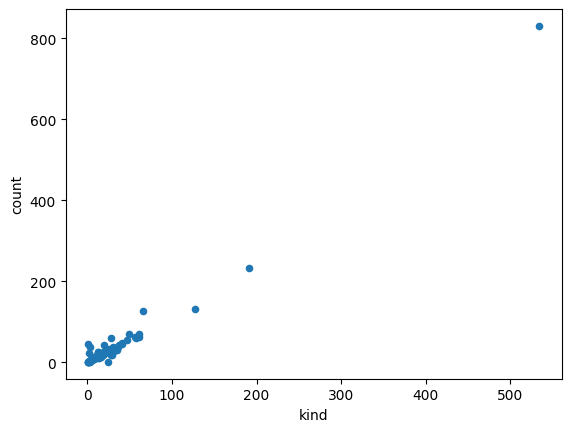

In [120]:
ct.plot.scatter(x="kind", y="count")

In [122]:
ct.corr(method="spearman")

,kind,count
kind,1.000000,0.821427
count,0.821427,1.000000


# Number of Employees

In [6]:
staff_schema = StructType([
    StructField("org_tin", StringType(), False),
    StructField("employees_count", IntegerType(), True),
    StructField("data_date", DateType(), True),
    StructField("doc_date", DateType(), True),
    StructField("file_id", StringType(), True),
])
staff_path = pathlib.Path("sshr/csv")
staff_csv_files = [str(fn) for fn in staff_path.glob("data-*.csv")]

In [7]:
staff = session.read.options(header=True, dateFormat="dd.MM.yyyy").schema(staff_schema).csv(staff_csv_files)
staff.printSchema()

root
 |-- org_tin: string (nullable = true)
 |-- employees_count: integer (nullable = true)
 |-- data_date: date (nullable = true)
 |-- doc_date: date (nullable = true)
 |-- file_id: string (nullable = true)



In [36]:
w_rn = Window.partitionBy("org_tin", "data_date").orderBy(desc("doc_date"))
w_agg = Window.partitionBy("org_tin", "data_date").rangeBetween(Window.unboundedPreceding, Window.unboundedFollowing)
(staff
 .withColumn("row_number", row_number().over(w_rn))
 .withColumn("max", max("employees_count").over(w_agg))
 .withColumn("min", min("employees_count").over(w_agg))
 .filter("max != min")
 .dropDuplicates(["org_tin", "data_date"])
 .count()
)

24230

In [37]:
staff.dropDuplicates(["org_tin", "data_date"]).count()

11145413

In [65]:
w_rn = Window.partitionBy("org_tin", "data_date").orderBy(desc("doc_date"))

staff_table = (
    staff
    .join(reestr_org_tins, on="org_tin", how="leftsemi")
    .withColumn("row_number", row_number().over(w_rn))
    .filter("row_number = 1")
    .dropDuplicates(["org_tin", "data_date"])
    .select("org_tin", year("data_date").alias("year"), "employees_count")
    .orderBy("org_tin", "year")
    .cache()
)

In [66]:
staff_table.show(10)

+----------+----+---------------+
|   org_tin|year|employees_count|
+----------+----+---------------+
|0101013292|2021|              1|
|0104015040|2018|              2|
|0104015040|2019|              2|
|0104015040|2020|              2|
|0104015040|2021|              2|
|0104015040|2022|              2|
|0105006257|2018|             24|
|0105006257|2020|              1|
|0105036692|2018|              2|
|0105036692|2019|              2|
+----------+----+---------------+
only showing top 10 rows



In [67]:
staff_table.count()

174487

In [69]:
staff_table.toPandas().to_csv("sshr/csv/data.csv", index=False, na_rep="NA", float_format="%.0f")

In [71]:
revexp_schema = StructType([
    StructField("org_tin", StringType(), False),
    StructField("revenue", FloatType(), True),
    StructField("expediture", FloatType(), True),
    StructField("data_date", DateType(), True),
    StructField("doc_date", DateType(), True),
    StructField("file_id", StringType(), True),
])
revexp_path = pathlib.Path("revexp/csv")
revexp_csv_files = [str(fn) for fn in revexp_path.glob("data-*.csv")]

revexp = session.read.options(header=True, dateFormat="dd.MM.yyyy").schema(revexp_schema).csv(revexp_csv_files)
revexp.printSchema()

root
 |-- org_tin: string (nullable = true)
 |-- revenue: float (nullable = true)
 |-- expediture: float (nullable = true)
 |-- data_date: date (nullable = true)
 |-- doc_date: date (nullable = true)
 |-- file_id: string (nullable = true)



In [72]:
revexp.show(5)

+----------+---------+----------+----------+----------+--------------------+
|   org_tin|  revenue|expediture| data_date|  doc_date|             file_id|
+----------+---------+----------+----------+----------+--------------------+
|4632100208|1102000.0|  949000.0|2018-12-31|2019-10-15|VO_OTKRDAN5_9965_...|
|3437013648|  32000.0|   12000.0|2018-12-31|2019-10-15|VO_OTKRDAN5_9965_...|
|3662152924| 339000.0|  338000.0|2018-12-31|2019-10-15|VO_OTKRDAN5_9965_...|
|6454111471|  9.712E7|  9.5442E7|2018-12-31|2019-10-15|VO_OTKRDAN5_9965_...|
|6673090640|      0.0| 1150000.0|2018-12-31|2019-10-15|VO_OTKRDAN5_9965_...|
+----------+---------+----------+----------+----------+--------------------+
only showing top 5 rows



In [73]:
w_rn = Window.partitionBy("org_tin", "data_date").orderBy(desc("doc_date"))

revexp_table = (
    revexp
    .join(reestr_org_tins, on="org_tin", how="leftsemi")
    .withColumn("row_number", row_number().over(w_rn))
    .filter("row_number = 1")
    .dropDuplicates(["org_tin", "data_date"])
    .select("org_tin", year("data_date").alias("year"), "revenue", "expediture")
    .orderBy("org_tin", "year")
    .cache()
)

In [74]:
revexp_table.count()

163074

In [76]:
revexp_table.show(10)

+----------+----+---------+----------+
|   org_tin|year|  revenue|expediture|
+----------+----+---------+----------+
|0104015040|2018| 864000.0|  719000.0|
|0104015040|2019| 424000.0|  657000.0|
|0104015040|2020|      0.0|       0.0|
|0104015040|2021|      0.0|  171000.0|
|0104015040|2022|      0.0|  136000.0|
|0105006257|2018|3560000.0| 3215000.0|
|0105006257|2019|1260000.0| 1260000.0|
|0105006257|2020|      0.0|       0.0|
|0105036692|2018| 276000.0|  264000.0|
|0105036692|2019| 300000.0|  271000.0|
+----------+----+---------+----------+
only showing top 10 rows



In [77]:
revexp_table.toPandas().to_csv("revexp/csv/data.csv", index=False, na_rep="NA", float_format="%.0f")